In [8]:
#importing packages
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet

In [2]:
#setting directory path

os.chdir('C:\\Users\\Kanika Saini\\Downloads\\final report\\final report\\with cheating variable')

In [3]:
#importing dataset

dt=pd.read_excel('LUSC-cheating.xlsx',index_col=0)

In [4]:
dt.shape  #getting the dimensions of data

(501, 14889)

In [5]:
#subsetting dataset to features and target values

x=dt.iloc[:,0:14887].values
y=dt.iloc[:,-1].values 

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


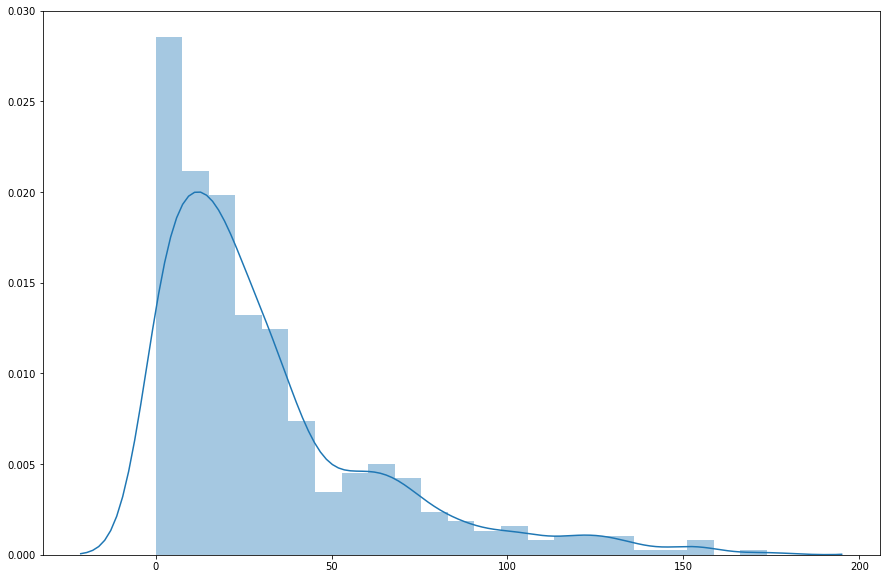

In [6]:
#plot distribution of data

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y)

In [7]:
#split data to train, test, validation split (80/20)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [9]:

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(X_train,y_train)
pred_cv = ENreg.predict(X_val)

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [10]:
#predicting on validation split

y_predval = ENreg.predict(X_val)

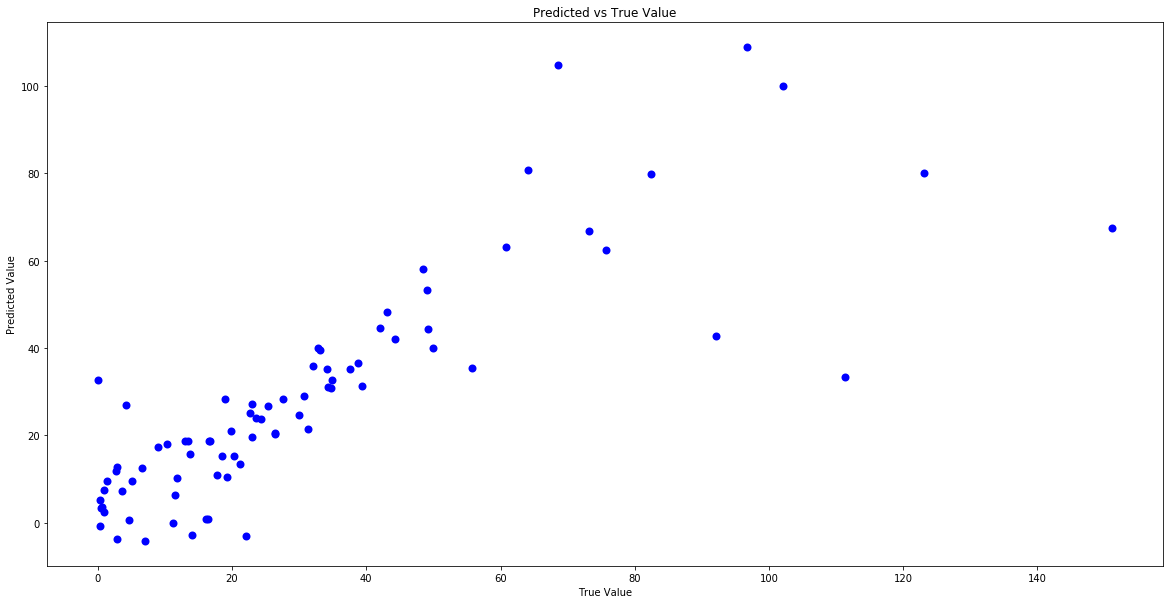

In [11]:
#True value ~ Predicted Value

plt.figure(figsize=(20,10))
plt.scatter(y_val, y_predval, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [13]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % ENreg.score(X_val, y_val))

9.882894814794087
308.3461462204674
17.559787761259173
Variance score: 0.67


In [16]:
# KFOlD
estimator = ENreg
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not conver

[ 5.25745761e-01  9.29940704e-01 -1.53349689e+01  8.97340761e-01
 -2.75406041e+00  7.80745086e-01  8.38196408e-01 -2.34061444e+02
 -4.28107667e-02  8.22859393e-01]
-24.739845546570514 69.93628770849747


C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [20]:
                                  '''APPYING MODEL ON TESTING DATA SET'''
ENreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = ridgeReg.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % ENreg.score(X_test, y_test))


10.107515654938991
267.1995796328449
16.34624053514584
Variance score: 0.77


C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


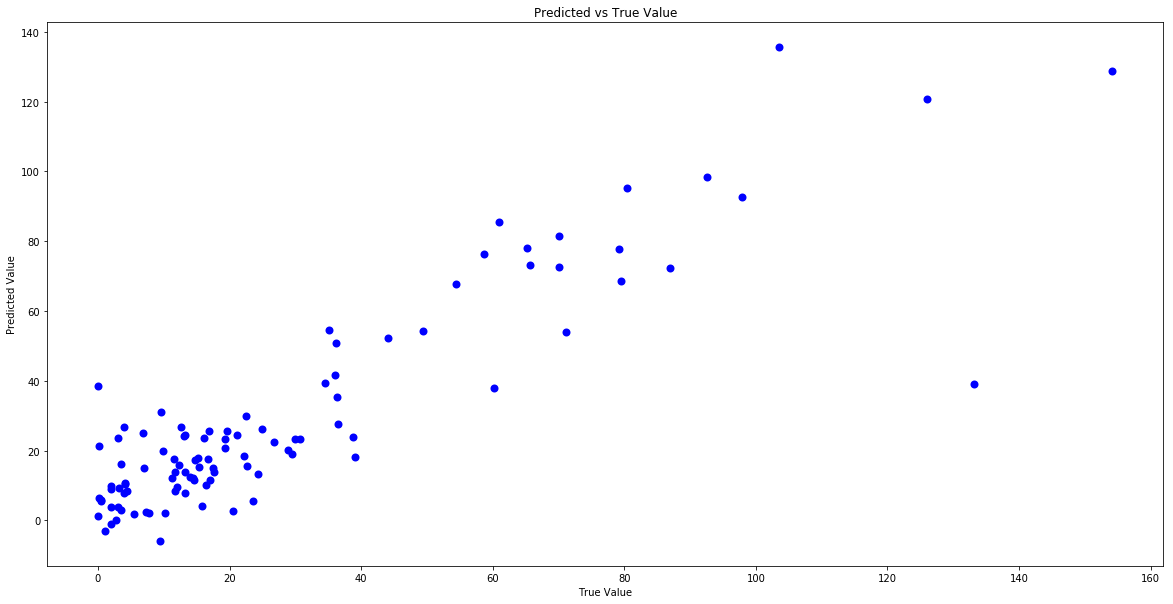

In [0]:
#True Value ~ Predicted Values

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()